In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

In [3]:
data = np.load('./feature_vector_v1.npy')

In [4]:
data.shape

(11076, 22)

In [52]:
data = MinMaxScaler().fit_transform(data)
# data = StandardScaler().fit_transform(data)

In [53]:
data[:, 0]

array([0.24825986, 0.23955916, 0.25928074, ..., 0.01972158, 0.02552204,
       0.02842227])

In [178]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)

In [179]:
data_tsne.shape

(11076, 2)

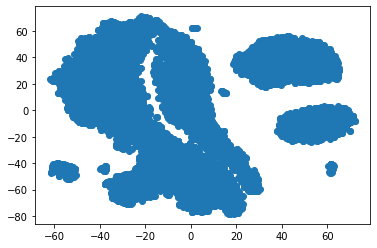

In [180]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [187]:
model = DBSCAN(eps=0.3, min_samples=30).fit(data)
labels_1 = model.labels_

73
[[0.35092807 0.27631579 0.33576642 ... 0.33024251 0.35997559 0.66336634]
 [0.38341067 0.34210526 0.32116788 ... 0.37018545 0.38865162 0.58912387]
 [0.38051044 0.36184211 0.3649635  ... 0.35734665 0.37339841 0.39726027]
 ...
 [0.35382831 0.31578947 0.4379562  ... 0.32810271 0.37034777 0.94762684]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.3387471  0.30921053 0.37226277 ... 0.30527817 0.35631483 0.87521368]]


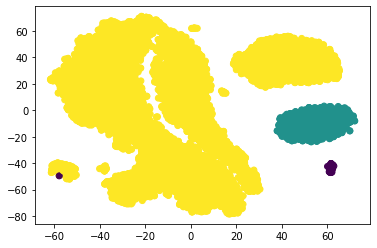

In [188]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_1)
outliers_1 = data[labels_1 == -1]
print(len(outliers_1))
print(outliers_1)

In [176]:
model = IsolationForest(max_samples=100).fit(data)
labels_2 = model.predict(data)

1398


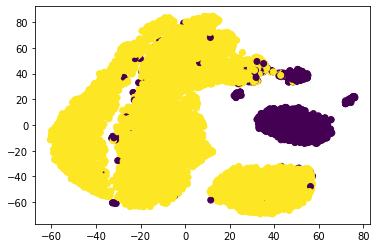

In [177]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_2)
outliers_2 = data[labels_2 == -1]
print(len(outliers_2))